In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
transform = torchvision.transforms.Compose(transforms=[
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(size=(500, 500)),
    torchvision.transforms.ToTensor(),
])

In [4]:
def get_scale_matrix(scale_factor, device):
    zeros = torch.zeros_like(input=scale_factor).to(device)
    return torch.stack(tensors=[scale_factor, zeros, zeros, zeros, scale_factor, zeros]).view(2,3)

In [5]:
def scale_img(x, scale_factor, device):
    scale_mat = get_scale_matrix(scale_factor=scale_factor, device=device).unsqueeze(dim=0).repeat(x.shape[0],1,1)    # repeat for whole batch
    grid = F.affine_grid(theta=scale_mat, size=x.size(), align_corners=False)
    x = F.grid_sample(input=x, grid=grid, align_corners=False)
    return x

In [6]:
im = torchvision.transforms.Resize(size=(500, 500))(torchvision.io.read_image("images/dog_cat.jpg").type(torch.FloatTensor)).to(device)
im.requires_grad = True
im = im.unsqueeze(dim=0)

<Figure size 432x288 with 0 Axes>

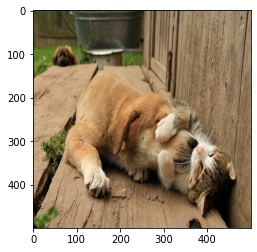

<Figure size 432x288 with 0 Axes>

In [7]:
plt.imshow(im.detach().cpu().squeeze(0).permute(1,2,0)/255)
plt.figure()

In [20]:
scale_factor = torch.FloatTensor([0.3]).to(device)
scale_factor.requires_grad=True

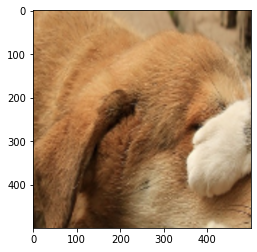

In [21]:
#Scale by 1/2 with autograd support:
scaled_im = scale_img(x=im, scale_factor=scale_factor, device=device)
plt.imshow(scaled_im.detach().cpu().squeeze(0).permute(1,2,0)/255)

In [17]:
loss = torch.mean((im-scaled_im)**2)

In [12]:
loss.backward()

In [14]:
scale_factor.grad

tensor([198.9684], device='cuda:0')

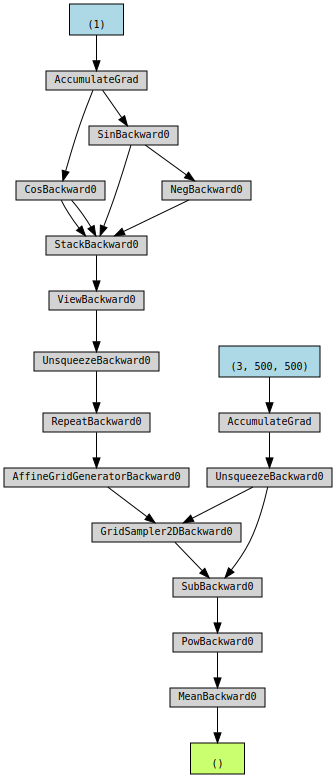

In [200]:
from torchviz import make_dot
make_dot(loss)